In [1]:
from agent.a2c_model import A2CTrainer
from utils.ModelVersionManager import ModelVersionManager
from customEnv.SimpleCornIrrigationEnv import SimpleCornIrrigationEnv

In [2]:
train_env = SimpleCornIrrigationEnv(
    season_length=120,
    render_mode=None,
    difficulty="normal",
    region_type="temperate",
    seed=42
)

# Verify environment setup
print("Observation Space:", train_env.observation_space)
print("Action Space:", train_env.action_space)

Observation Space: Box(0.0, [100. 120.   4.  40.  50. 100.], (6,), float32)
Action Space: Discrete(4)


In [3]:
model_manager = ModelVersionManager(base_dir="./models")
trainer = A2CTrainer(model_version_manager=model_manager, log_dir="./logs/a2c")

In [4]:
model, training_time, model_path = trainer.train(
    env=train_env,
    total_timesteps=100000,
    learning_rate=0.0007,
    gamma=0.99,
    n_steps=8,
    ent_coef=0.01,
    vf_coef=0.5,
    use_adaptive_lr=True,
    min_lr=0.00001,
    lr_decay_factor=0.95,
    lr_update_freq=10000,
    policy="MlpPolicy",
    seed=42,
    save_model=True,
    eval_freq=5000,
    continue_training=False
)

print(f"Training completed in {training_time:.2f} seconds")
print(f"Model saved at: {model_path}")

Creating a new model (continue_training=False).


c:\Users\Yeoh Ming Zhe\Documents\GitHub\Intelligent_Irrigation_System\venv\Lib\site-packages\stable_baselines3\common\on_policy_algorithm.py:150: UserWarning: You are trying to run CustomA2C on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(



----- Step 5000 -----
Mean reward: -537.30
Episodes: 5
New best model saved with reward: -537.30
Learning rate adjusted to 0.000665 at step 10000

----- Step 10000 -----
Mean reward: 625.27
Episodes: 5
New best model saved with reward: 625.27

----- Step 15000 -----
Mean reward: 732.90
Episodes: 5
New best model saved with reward: 732.90
Learning rate adjusted to 0.000632 at step 20000

----- Step 20000 -----
Mean reward: 717.47
Episodes: 5

----- Step 25000 -----
Mean reward: 789.69
Episodes: 5
New best model saved with reward: 789.69
Learning rate adjusted to 0.000600 at step 30000

----- Step 30000 -----
Mean reward: 732.34
Episodes: 5

----- Step 35000 -----
Mean reward: 769.57
Episodes: 5
Learning rate adjusted to 0.000570 at step 40000

----- Step 40000 -----
Mean reward: 667.93
Episodes: 5

----- Step 45000 -----
Mean reward: 727.35
Episodes: 5
Learning rate adjusted to 0.000542 at step 50000

----- Step 50000 -----
Mean reward: 889.17
Episodes: 5
New best model saved with rewa

In [5]:
results = trainer.evaluate(model, train_env, n_eval_episodes=10, deterministic=True)


===== Evaluation Results =====
Episodes: 10
Mean Reward: 951.79 ± 104.64
Mean Yield: 1.03
Mean Water Used: 0.00
Mean Water Efficiency: 103494310.5215



--- Day 1 | Seedling Stage ---
Soil Moisture: 62.1%
Weather: Temp 25.0°C | Rain 5.2mm
Yield Potential: 1.00
Last Action: 15mm irrigation
Last Reward: 7.03

--- Day 2 | Seedling Stage ---
Soil Moisture: 65.0%
Weather: Temp 27.3°C | Rain 0.0mm
Yield Potential: 1.01
Last Action: 0mm irrigation
Last Reward: 19.10

--- Day 3 | Seedling Stage ---
Soil Moisture: 63.7%
Weather: Temp 22.9°C | Rain 0.0mm
Yield Potential: 1.02
Last Action: 0mm irrigation
Last Reward: 7.10

--- Day 4 | Seedling Stage ---
Soil Moisture: 77.6%
Weather: Temp 20.2°C | Rain 0.0mm
Yield Potential: 1.03
Last Action: 15mm irrigation
Last Reward: 7.03

--- Day 5 | Seedling Stage ---
Soil Moisture: 76.6%
Weather: Temp 24.5°C | Rain 5.9mm
Yield Potential: 1.04
Last Action: 0mm irrigation
Last Reward: 7.10

--- Day 6 | Seedling Stage ---
Soil Moisture: 80.2%
Weather: Temp 27.7°C | Rain 0.0mm
Yield Potential: 1.04
Last Action: 0mm irrigation
Last Reward: 9.03

--- Day 7 | Seedling Stage ---
Soil Moisture: 78.8%
Weather: Temp 

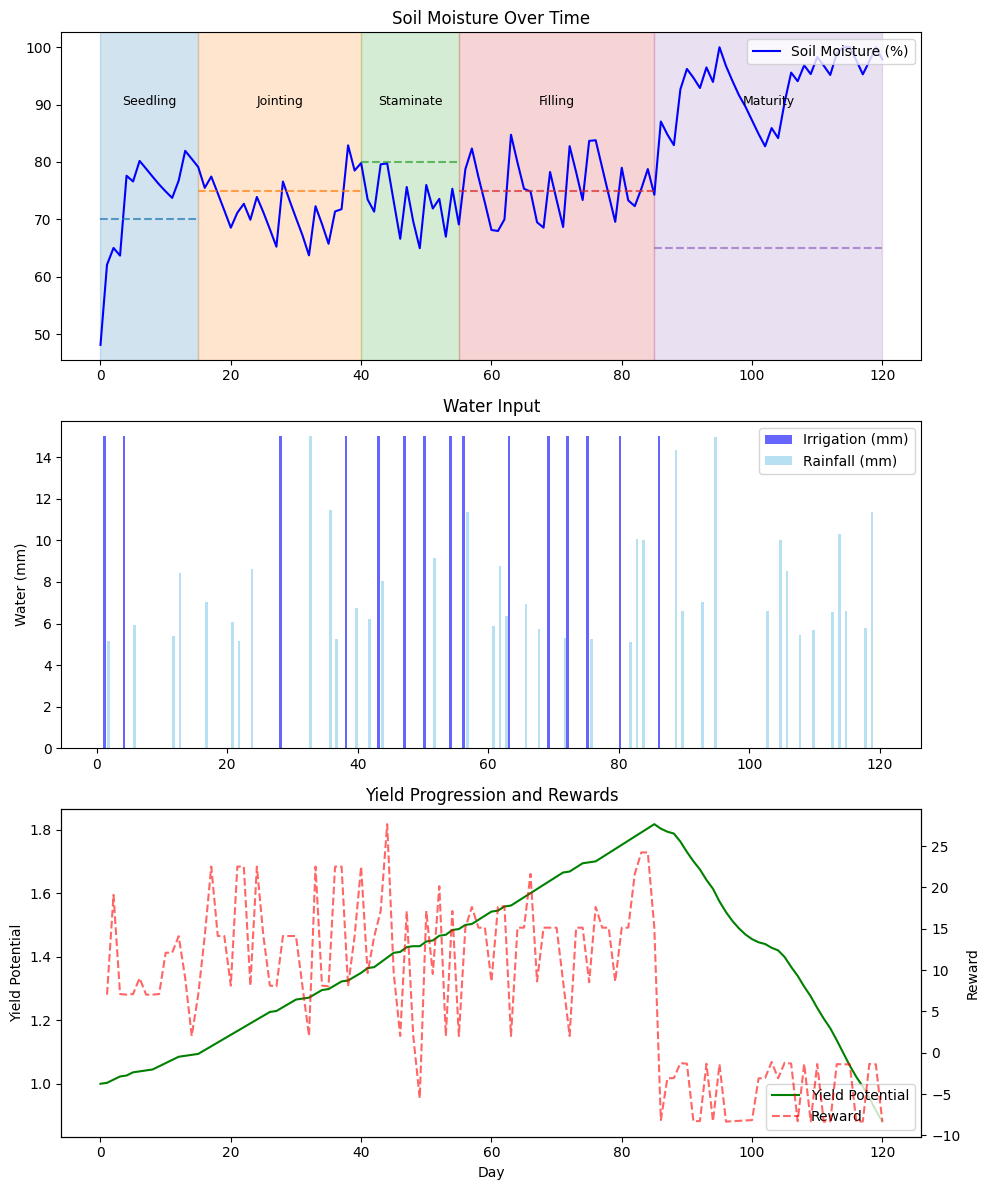


--- Season Summary ---
Final Yield: 0.88
Total Water Used: 225.0 mm
Total Rainfall: 314.2 mm
Water Efficiency: 0.391


In [6]:
# Create evaluation environment with rendering
eval_env = SimpleCornIrrigationEnv(
    season_length=120,
    render_mode="human",
    difficulty="normal",
    region_type="temperate",
    seed=100
)

# Run single episode
total_reward, final_yield, total_water = trainer.run_single_episode(eval_env)

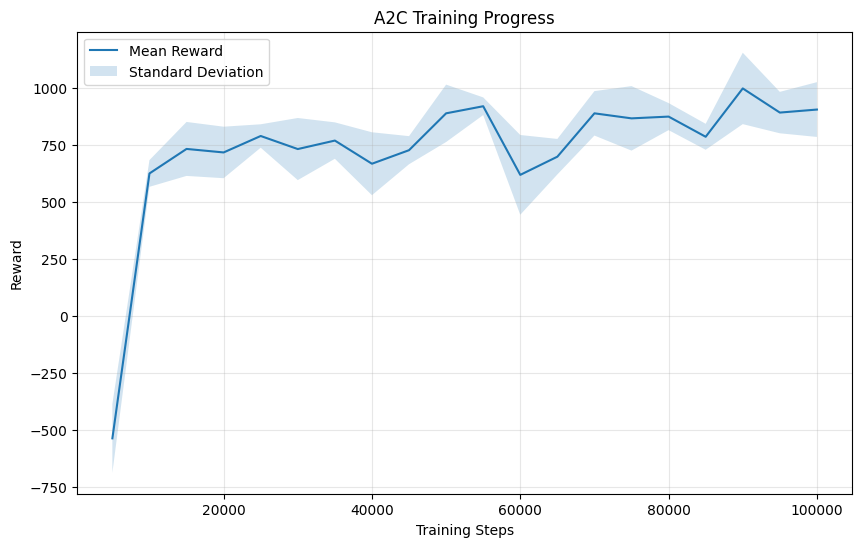

In [7]:
trainer.plot_simple_training_progress()